In [1]:
# GFlowNets
from matgfn.gflow.environments.hypergrid import HypergridEnvironment 
from matgfn.gflow.flow_models.mlp import MLP
from matgfn.gflow.agent import TrajectoryBalanceGFlowNet

# Data
import matplotlib.pyplot as plt
import numpy as np

# Simple environment

In [2]:
env = HypergridEnvironment(dimensions=2, grid_size=8)
flow_model = MLP(dimensions=2)
agent = TrajectoryBalanceGFlowNet(env = env, flow_model=flow_model)

In [4]:
observations, infos, rewards, losses, logZs = agent.fit(learning_rate=5e-3, num_episodes=25000, minibatch_size=5)

0.139, 3.008070468902588: 100%|██████████| 25000/25000 [01:01<00:00, 409.60it/s]  


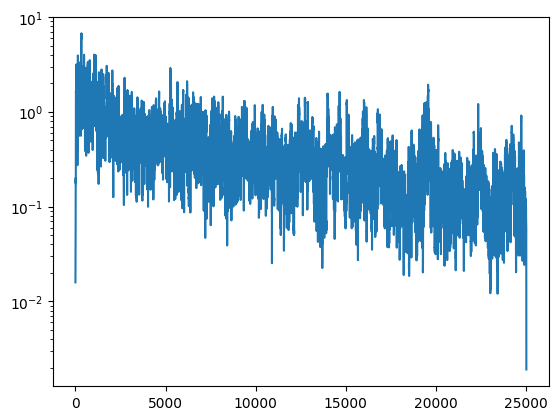

In [5]:
plt.yscale("log")
plt.plot(np.convolve(losses, np.ones(16) / 16))

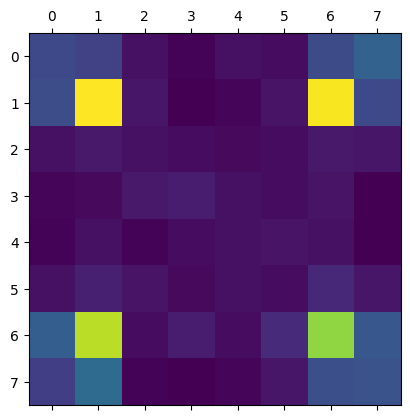

In [6]:
counts = np.zeros(env.observation_space.high + 1)

for obs in observations[-1000:]:
    counts[int(obs[0]), int(obs[1])] += 1

plt.matshow(counts)